In [1]:
%%classpath add mvn
com.github.haifengl smile-scala_2.12 1.5.2

In [2]:
import java.awt.image.BufferedImage
import java.awt.Color
import javax.imageio.ImageIO
import java.io.File
import smile.clustering._

import java.awt.image.BufferedImage
import java.awt.Color
import javax.imageio.ImageIO
import java.io.File
import smile.clustering._


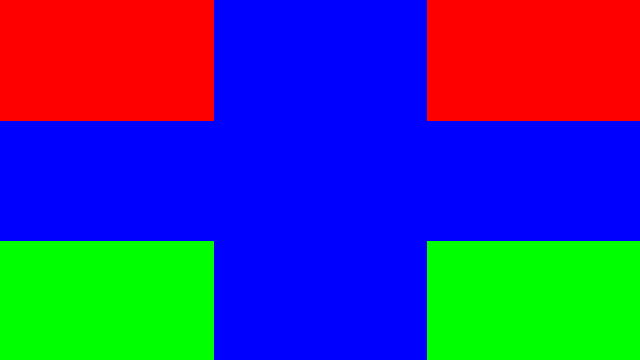

In [3]:
val testImageWidth = 640
val testImageHight = 360
val testImage = new BufferedImage(testImageWidth, testImageHight, BufferedImage.TYPE_INT_RGB)

for {
    x <- (0 until testImageWidth)
    y <- (0 until testImageHight)
    color = if (y <= testImageHight / 3 && (x <= testImageWidth / 3 || x > testImageWidth / 3 * 2)) Color.RED
    else if (y > testImageHight / 3 * 2 && (x <= testImageWidth / 3 || x > testImageWidth / 3 * 2)) Color.GREEN
    else Color.BLUE
} testImage.setRGB(x, y, color.getRGB)

testImage

In [4]:
case class Pixel(x: Int, y: Int, rgbArray: Array[Double], clusterNumber: Option[Int] = None)

defined class Pixel


In [5]:
val pixels = for {
    x <- (0 until testImage.getWidth).toArray
    y <- (0 until testImage.getHeight)
    color = new Color(testImage.getRGB(x, y))
} yield Pixel(x, y, Array(color.getRed.toDouble, color.getGreen.toDouble, color.getBlue.toDouble))

pixels.take(10)

[Pixel(0,0,[D@5ce845f,None), Pixel(0,1,[D@5b8e42c8,None), Pixel(0,2,[D@60ee9831,None), Pixel(0,3,[D@1249f21b,None), Pixel(0,4,[D@63546071,None), Pixel(0,5,[D@4ae5e6d1,None), Pixel(0,6,[D@5e5ec0ac,None), Pixel(0,7,[D@3da3856,None), Pixel(0,8,[D@43cd87b4,None), Pixel(0,9,[D@26fb3272,None)]

In [6]:
val countColors = 3
val clusters = kmeans(pixels.map(_.rgbArray), k = countColors, runs = 20)

K-Means distortion: 0.00000
Clusters of 230400 data points of dimension 3:
  0	51667 (22.4%)
  1	127920 (55.5%)
  2	50813 (22.1%)


In [7]:
val clusteredPixels = (pixels zip clusters.getClusterLabel()).map {case (pixel, cluster) => pixel.copy(clusterNumber = Some(cluster))}

clusteredPixels.take(10)

[Pixel(0,0,[D@5ce845f,Some(0)), Pixel(0,1,[D@5b8e42c8,Some(0)), Pixel(0,2,[D@60ee9831,Some(0)), Pixel(0,3,[D@1249f21b,Some(0)), Pixel(0,4,[D@63546071,Some(0)), Pixel(0,5,[D@4ae5e6d1,Some(0)), Pixel(0,6,[D@5e5ec0ac,Some(0)), Pixel(0,7,[D@3da3856,Some(0)), Pixel(0,8,[D@43cd87b4,Some(0)), Pixel(0,9,[D@26fb3272,Some(0))]

In [8]:
val grayColor = Array(127.0, 127.0, 127.0)
val blueClusterNumber = clusteredPixels.groupBy(pixel => pixel.clusterNumber)
    .map {case (clusterNumber, pixels) => (clusterNumber, pixels.size) }
    .maxBy(_._2)._1

val modifiedPixels = clusteredPixels.map {
    case p: Pixel if p.clusterNumber == blueClusterNumber => p.copy(rgbArray = grayColor)
    case p: Pixel => p
}

modifiedPixels.take(10)

[Pixel(0,0,[D@5ce845f,Some(0)), Pixel(0,1,[D@5b8e42c8,Some(0)), Pixel(0,2,[D@60ee9831,Some(0)), Pixel(0,3,[D@1249f21b,Some(0)), Pixel(0,4,[D@63546071,Some(0)), Pixel(0,5,[D@4ae5e6d1,Some(0)), Pixel(0,6,[D@5e5ec0ac,Some(0)), Pixel(0,7,[D@3da3856,Some(0)), Pixel(0,8,[D@43cd87b4,Some(0)), Pixel(0,9,[D@26fb3272,Some(0))]

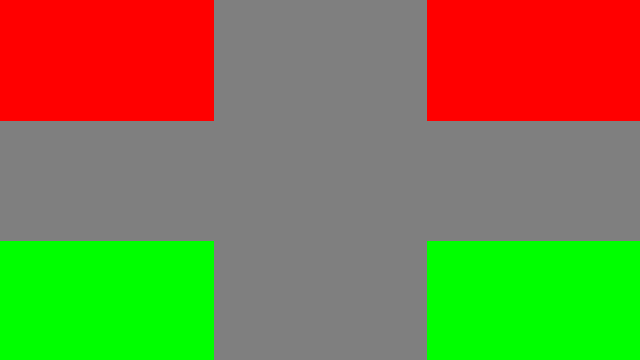

In [9]:
val modifiedImage = new BufferedImage(testImageWidth, testImageHight, BufferedImage.TYPE_INT_RGB)
modifiedPixels.foreach { 
    case Pixel(x, y, rgbArray, _) => 
        val r = rgbArray(0).toInt
        val g = rgbArray(1).toInt
        val b = rgbArray(2).toInt
        modifiedImage.setRGB(x, y, new Color(r, g, b).getRGB)
}

modifiedImage

In [10]:
ImageIO.write(testImage, "png", new File("testImage.png"))
ImageIO.write(modifiedImage, "png", new File("modifiedImage.png"))

true